# Import Required Liberaries

In [124]:
import pandas as pd
import numpy as np
from numpy import sort
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import f_classif
from xgboost import XGBClassifier
import pickle

# Loading Data Sets

In [2]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
gender = pd.read_csv('gender_submission.csv')
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# Checking the shape of Data Sets

In [5]:
train.shape

(891, 12)

In [6]:
test.shape

(418, 11)

In [7]:
gender.shape

(418, 2)

# Combine Train and Test Data Sets

In [8]:
df = pd.concat([train, test])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.shape

(1309, 12)

# Data Analysis

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Changing Data Types

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.000,1.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292


# Checking Null Values

In [12]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Filling Null Values

In [14]:
def fill_na(frame):
    for i in frame.columns:
        if(((frame[i].isnull().sum() / len(frame))*100) <= 30) & (frame[i].dtype == 'int64'):
            frame[i] = frame[i].fillna(frame[i].median())
            
        elif(((frame[i].isnull().sum() / len(frame))*100) <= 30) & (frame[i].dtype == 'O'):
            frame[i] = frame[i].fillna(frame[i].mode()[0])
            
        elif(((frame[i].isnull().sum() / len(frame))*100) <= 30) & (frame[i].dtype == 'float64'):
            frame[i] = frame[i].fillna(frame[i].median())

In [15]:
fill_na(train)
fill_na(test)

In [16]:
train['Age'] = train['Age'].astype('int64')
test['Age'] = test['Age'].astype('int64')
df['Pclass'] = df['Pclass'].astype('O')

# Drop Columns With Most Null Values

In [17]:
train = train.drop(['PassengerId', 'Cabin', 'Name'], axis=1)
test = test.drop(['PassengerId', 'Cabin', 'Name'], axis=1)

# Encoding Categorical Features into numerical

In [18]:
def encode(dataframe):
    lec = LabelEncoder()
    for j in dataframe.columns:
        if(dataframe[j].dtype == 'object'):
            dataframe[j] = lec.fit_transform(dataframe[j])
            
encode(train)
encode(test)

# Spliting the data into train test

In [105]:
x = train.drop('Survived', axis=1)
y = train['Survived']

In [106]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# Creating Models

In [21]:
logistic = LogisticRegression(max_iter=10000)
logistic.fit(X_train, Y_train)

LogisticRegression(max_iter=10000)

In [22]:
logistic_pred = logistic.predict(X_test)

In [23]:
print(classification_report(Y_test, logistic_pred))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       153
           1       0.77      0.68      0.72       115

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.78      0.78      0.77       268



In [41]:
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)

[17:43:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
xgb_pred = xgb.predict(X_test)

In [43]:
print(classification_report(Y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84       153
           1       0.85      0.67      0.75       115

    accuracy                           0.81       268
   macro avg       0.82      0.79      0.79       268
weighted avg       0.81      0.81      0.80       268



In [111]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [112]:
rf_pred = rf.predict(X_test)

In [113]:
print(classification_report(Y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       143
           1       0.74      0.66      0.70       105

    accuracy                           0.76       248
   macro avg       0.75      0.74      0.75       248
weighted avg       0.76      0.76      0.76       248



In [47]:
ada = AdaBoostClassifier()
ada.fit(X_train, Y_train)

AdaBoostClassifier()

In [48]:
ada_pred = ada.predict(X_test)

In [49]:
print(classification_report(Y_test, ada_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.83       153
           1       0.81      0.70      0.75       115

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



In [114]:
estimators = [
    ('lr' , LogisticRegression(max_iter = 10000)),
    ('xgb' , XGBClassifier()),
    ('rf' , RandomForestClassifier()),
    ('ada' , AdaBoostClassifier()),
]

stack = StackingClassifier(estimators=estimators)
stack.fit(X_train, Y_train)

C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:25:14] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:25:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:25:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:25:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:25:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

StackingClassifier(estimators=[('lr', LogisticRegression(max_iter=10000)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None, gamma=None,
                                              gpu_id=None,
                                              importance_type='gain',
                                              interaction_constraints=None,
                                              learning_rate=None,
                                              max_delta_step=None,
                                              max_depth=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constr

In [115]:
stack_pred = stack.predict(X_test)

In [116]:
print(classification_report(Y_test, stack_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       143
           1       0.79      0.69      0.73       105

    accuracy                           0.79       248
   macro avg       0.79      0.78      0.78       248
weighted avg       0.79      0.79      0.79       248



In [117]:
accuracy_score(Y_test, stack_pred)

0.7903225806451613

# Feature Engineering

In [171]:
new_train = train.copy()
new_test = test.copy()

In [172]:
new_train['Total_Fam_Mem'] = new_train['SibSp'] + new_train['Parch']
new_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Total_Fam_Mem
0,0,3,1,22,1,0,523,7.2500,2,1
1,1,1,0,38,1,0,596,71.2833,0,1
2,1,3,0,26,0,0,669,7.9250,2,0
3,1,1,0,35,1,0,49,53.1000,2,1
4,0,3,1,35,0,0,472,8.0500,2,0


In [40]:
new_train['Total_Fam_Mem'] = new_train['SibSp'] + new_train['Parch']
new_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Total_Fam_Mem
0,0,3,1,22,1,0,523,7.2500,2,1
1,1,1,0,38,1,0,596,71.2833,0,1
2,1,3,0,26,0,0,669,7.9250,2,0
3,1,1,0,35,1,0,49,53.1000,2,1
4,0,3,1,35,0,0,472,8.0500,2,0


In [41]:
train2 = train2.drop(['SibSp', 'Parch'], axis=1)
test2 = test2.drop(['SibSp', 'Parch'], axis=1)

As we can see that after creating a new field Total_Fam_Mem from SibSp and Parch our model accuracy is decreased instead of icreasing i.e, i will not consider Total_Fam_Mem

# Dimensionality Reduction

Checking the correlation between Features

<AxesSubplot:>

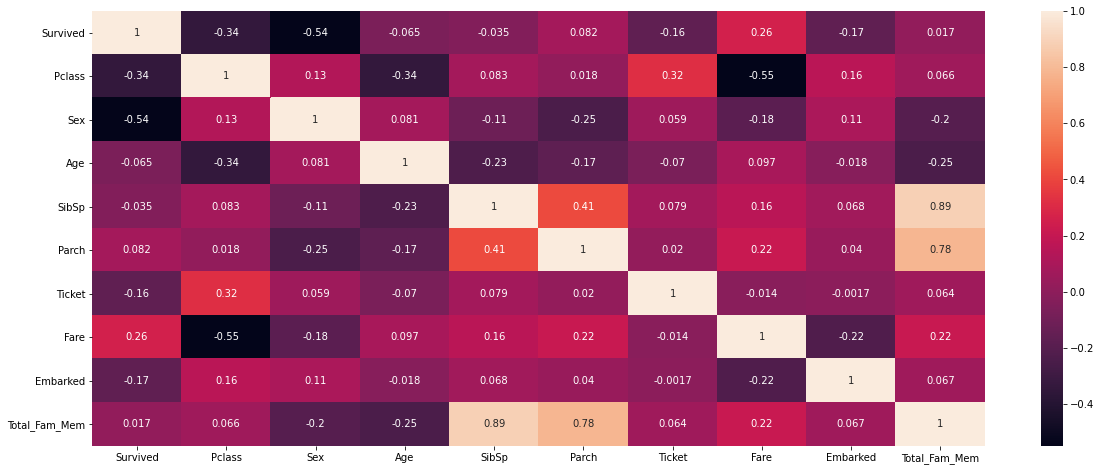

In [75]:
plt.figure(figsize=(20,8))
sns.heatmap(new_train.corr(), annot=True)

In [158]:
new_train = new_train.drop(['Pclass','Fare'], axis=1)
new_test = new_test.drop(['Pclass','Fare'], axis=1)

In [74]:
new_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Total_Fam_Mem
0,0,3,1,22,1,0,523,7.2500,2,1
1,1,1,0,38,1,0,596,71.2833,0,1
2,1,3,0,26,0,0,669,7.9250,2,0
3,1,1,0,35,1,0,49,53.1000,2,1
4,0,3,1,35,0,0,472,8.0500,2,0


# Feature Selection

In [143]:
f = f_classif(X_train, Y_train)
new_df = pd.DataFrame(f)
new_df.columns = X_train.columns
new_df

,Pclass,Sex,Age,Parch,Ticket,Fare,Embarked,Total_Fam_Mem
0,8.508382e+01,2.935913e+02,2.606216,10.329115,11.320668,4.351660e+01,20.198343,2.120623
1,4.414186e-19,3.502995e-54,0.106953,0.001377,0.000814,9.007215e-11,0.000008,0.145833


# Predicting the Survival and creating submission file

In [88]:
test['Survived'] = rf.predict(test)

In [89]:
submit = pd.DataFrame({
    'PassengerId' : gender['PassengerId'],
    'Survived' : test['Survived']
})
submit.to_csv('Submition.csv', index=False)

In [134]:
pickle.dump(stack, open('model.pkl', 'wb'))

# Coclusion

# Best Model

My best model is stacking because it gives me accuracy of 81 percent

# Important Features

Age and Sex are very important features because i am droping these features my models accuracy is decrease to 69 percent 

# Hyper Parameter Tuning

In [87]:
test = test.drop('Survived', axis=1)